# Linear SVM

<font color='red'>Assignment:</font> Load the data in "../data/svm.csv" into a DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("svm.csv")
df.head()

,x1,x2,y
0,0.800295,0.074122,1
1,2.080688,1.987278,0
2,0.981368,0.164505,1
3,2.094340,1.477435,0
4,1.686915,1.081737,0


<font color='red'>Assignment:</font> Import **SVC** from sklearn, and train a SVM classifier using **Linear Kernel** to predict y with **x1** and **x2**. No need to hold out a test set this time.

In [3]:
# Set features and target

features = list(df.columns)
target = "y"
features.remove(target)

X_df = df[features]
y_df = df[target]

<font color='red'>Assignment:</font> Find out the **support vectors** and plot them together with data points.

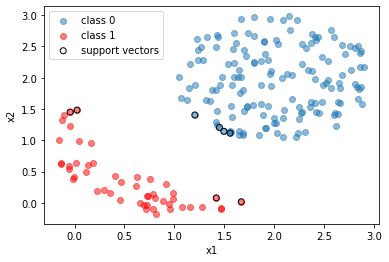

In [4]:
# no scaler

clf = SVC(kernel="linear")
clf.fit(X_df, y_df)
sv = clf.support_vectors_
plt.scatter(X_df[df["y"]==0]['x1'], X_df[df["y"]==0]['x2'], alpha=0.5, label="class 0")
plt.scatter(X_df[df["y"]==1]['x1'], X_df[df["y"]==1]['x2'], c="red", alpha=0.5, label="class 1")
plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='black', label="support vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

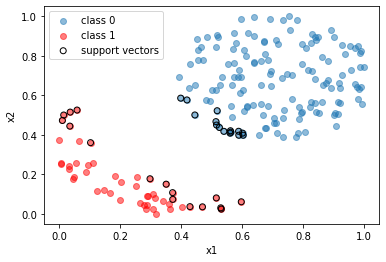

In [5]:
# MinMax scaler

clf = make_pipeline(MinMaxScaler(feature_range=(0, 1)), SVC(kernel="linear", C=1))
clf.fit(X_df, y_df)

sv = clf[1].support_vectors_
scaled_X = clf[0].transform(X_df)
plt.scatter(scaled_X[df["y"]==0][:, 0], scaled_X[df["y"]==0][:, 1], alpha=0.5, label="class 0")
plt.scatter(scaled_X[df["y"]==1][:, 0], scaled_X[df["y"]==1][:, 1], c="red", alpha=0.5, label="class 1")
plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='black', label="support vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

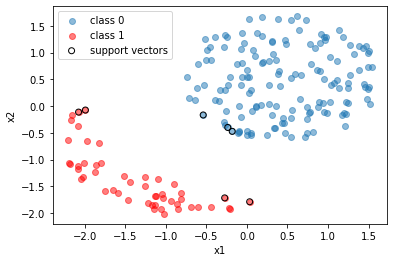

In [6]:
# Standard scaler

clf = make_pipeline(StandardScaler(), SVC(kernel="linear"))
clf.fit(X_df, y_df)

sv = clf[1].support_vectors_
scaled_X = clf[0].transform(X_df)
plt.scatter(scaled_X[df["y"]==0][:, 0], scaled_X[df["y"]==0][:, 1], alpha=0.5, label="class 0")
plt.scatter(scaled_X[df["y"]==1][:, 0], scaled_X[df["y"]==1][:, 1], c="red", alpha=0.5, label="class 1")
plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='black', label="support vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

<font color='red'>Question:</font> What are support vectors?

**ANS**
<br>Support vectors are data points closest to the hyperplane (decision surface).

<font color='red'>Question:</font> How many support vectors in this model? Where do they locate?

In [7]:
# Number and location of support vectors for each class
print("Numebr of support vectors:", clf[1].n_support_)
print("Location of support vectors:\n", sv)

Numebr of support vectors: [3 4]
Location of support vectors:
 [[-0.53950666 -0.16533619]
 [-0.18185124 -0.47132567]
 [-0.23663851 -0.39919147]
 [ 0.03363193 -1.78670461]
 [-0.27455312 -1.71440336]
 [-1.99284885 -0.07332089]
 [-2.07726028 -0.11163818]]


**ANS**
<br>There are 7 support vectors, 3 for class 0 and 4 for class 1. They are located close to the hyperplane.

<font color='red'>Assignment:</font> Change hyper parameter **C** and find out how the number and locations of support vectors are affected.

In [8]:
# Train SVM classifier with a different C

clf = make_pipeline(StandardScaler(), SVC(C=0.01, kernel="linear"))

clf.fit(X_df, y_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, kernel='linear'))])

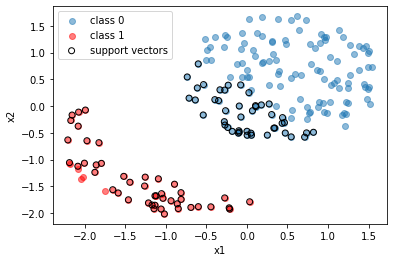

In [9]:
# Plot the support vectors with a different C

sv = clf[1].support_vectors_
scaled_X = clf[0].transform(X_df)
plt.scatter(scaled_X[df["y"]==0][:, 0], scaled_X[df["y"]==0][:, 1], alpha=0.5, label="class 0")
plt.scatter(scaled_X[df["y"]==1][:, 0], scaled_X[df["y"]==1][:, 1], c="red", alpha=0.5, label="class 1")
plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='black', label="support vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

In [10]:
# Number of support vectors for each class with a different C
print("Numebr of support vectors:", clf[1].n_support_)

Numebr of support vectors: [45 45]


plot with margin
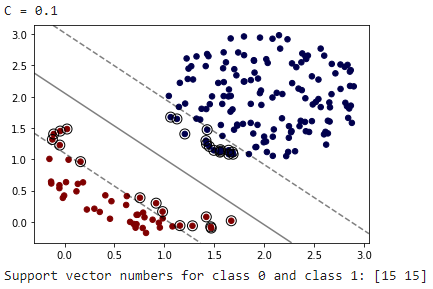

<font color='red'>Question:</font> When **C** is relatively small (e.g. 0.01), how many support vectors in positive and negative classes, respectively? Do you see any problem with that?

**ANS**

There are 45 support vectors in both positie and negative classes.

By comparing to the plot of all data points, we see the numbers of data in the two classes are imbalanced. This is a problem because we used nearly all the data as support vectors in one class but not enough in the other class.

When C is very small, a large l2 regularization is introduced. The classifier will have low variance but high bias, thus a lot of misclassified data points allowed (large margin).

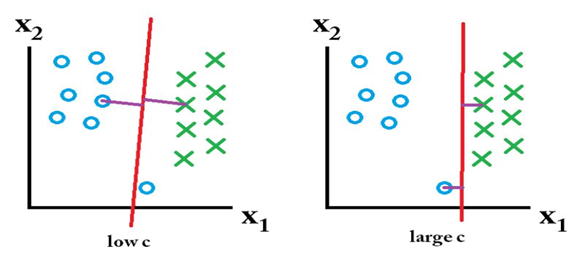

<font color='red'>Assignment:</font> Balance the classes (using **class_weight**), re-train the model, and find out the change of support vector numbers in positive and negative classes.

In [11]:
# Train SVM classifier with balanced classes

# clf = SVC(kernel="linear")
clf = make_pipeline(StandardScaler(), SVC(C=0.01, class_weight="balanced", kernel="linear"))

clf.fit(X_df, y_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.01, class_weight='balanced', kernel='linear'))])

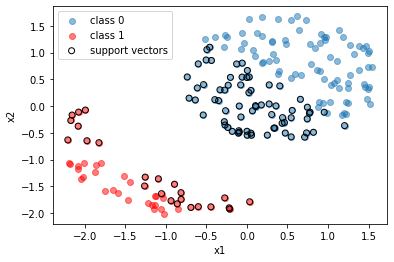

In [12]:
# Plot the support vectors with balanced classes

sv = clf[1].support_vectors_
scaled_X = clf[0].transform(X_df)
plt.scatter(scaled_X[df["y"]==0][:, 0], scaled_X[df["y"]==0][:, 1], alpha=0.5, label="class 0")
plt.scatter(scaled_X[df["y"]==1][:, 0], scaled_X[df["y"]==1][:, 1], c="red", alpha=0.5, label="class 1")
plt.scatter(sv[:, 0], sv[:, 1], facecolors='none', edgecolors='black', label="support vectors")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

In [13]:
# Number and location of support vectors for each class with balanced classes
print("Numebr of support vectors:", clf[1].n_support_)
# print("Location of support vectors:\n", sv)

Numebr of support vectors: [69 24]


**ANS**
<br>After balancing the classes, there becomes more support vectors in the negative class (original heavy class) and less support vectors in the positive class (original light class). The percentage of support vectors are similar for both classes.

<font color='red'>Question:</font> Is SVM sensitive to base rate? Why?

**ANS**
<br>Yes, when data is imbalanced, the hyperplane will favor the majority class and ignore the minority class.

<font color='red'>Question:</font> What is a hyperplane?

**ANS**
<br>A hyperplace is the decision surface the separate different classes.

<font color='red'>Question:</font> What is the optimal hyperplane for a SVM model?

**ANS**
<br>An optimal hyperplane maximizes the separation (margin) between classes.

<font color='red'>Question:</font> What is the difference between hard margin and soft margin? Which margin was adopted in the above model?

**ANS**

Hard margin does not allow misclassification (not tolerant to data points on the wrong side), while soft margin allows some misclassified data points to reach a larger margin with lower classification variance.

Soft margin was adopted through the hyperparameter C. Too high C tends to overfitting. Too low C tends to underfitting.

<font color='red'>Question:</font> What is hinge loss?

**ANS**
<br>Hinge loss is the cost function for SVM. For an intended output t = ±1 and a classifier score y, the hinge loss of the prediction y is defined as
<br>
<br>All points on the right side of the margin will have 0 hinge loss, and minimizing the hinge loss will find the best hyperplane (largest margin) with all points on the right side

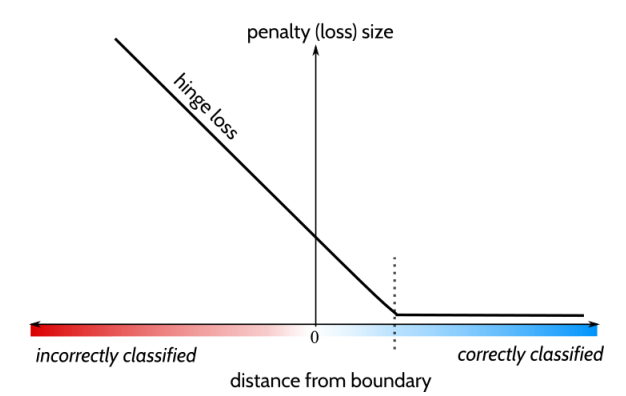

<font color='red'>Question:</font> What is the difference between SVM and Logistic Regression? What are the pros and cons of these two algorithm?

**ANS**

(1) SVM try to maximize the margin between the closest support vectors while LR the posterior class probability. Thus, SVM find a solution which is as fare as possible for the two categories while LR has not this property.

(2) LR is more sensitive to outliers than SVM because the cost function of LR diverges faster than those of SVM.

(3) Logistic Regression produces probabilistic values while SVM produces 1 or 0. So LR makes not absolute prediction and it does not assume data is enough to give a final decision. This maybe be good property when what we want is an estimation or we do not have high confidence into data.

(4) SVM extends by using kernel tricks, transforming datasets into rich features space, so that complex problems can be still dealt with in the same “linear” fashion in the lifted hyper space

<font color='red'>Question:</font> Given a data set with many columns and a relatively small amount of rows, which algorithm could be better? SVM or Logistic Regression?

**ANS**

Logistic Regression.

Lets take these as an example where :
n = number of features,
m = number of training examples
1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.
2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel
3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel

Generally, it is usually advisable to first try to use logistic regression to see how the model does, if it fails then you can try using SVM without a kernel (is otherwise known as SVM with a linear kernel). Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.

**Some of your hoemwork**
* logistic regression tends to overfit

**Choosing which model is more complicated then simply looking at the dimensions**

# Non-Linear SVM

**Example:** SVM visualization class

In [14]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline


class svm_visualization(object):
    
    def __init__(self, model, data):
        self.model = model
        self.data = data
        xrange = df.x1.max() - df.x1.min()
        yrange = df.x2.max() - df.x2.min()
        self.xmin = df.x1.min() - 0.1 * xrange
        self.xmax = df.x1.max() + 0.1 * xrange
        self.ymin = df.x2.min() - 0.1 * yrange
        self.ymax = df.x2.max() + 0.1 * yrange
        
    def show(self):
        self.plot_contour()
        self.plot_data()
        self.plot_sv()
        try:
            self.plot_boundry()
        except:
            print('Warning: No boundry is available!')
        plt.xlim(self.xmin, self.xmax)
        plt.ylim(self.ymin, self.ymax)

    def plot_data(self):
        df = self.data
        plt.scatter(df[df.y==0]['x1'], df[df.y==0]['x2'], alpha=0.5)
        plt.scatter(df[df.y==1]['x1'], df[df.y==1]['x2'], alpha=0.5)
        return plt
    
    def plot_sv(self):
        indices = self.model.support_
        svs = self.model.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], facecolors='none', edgecolors='r')
        return plt
    
    def plot_boundry(self):
        w = self.model.coef_[0]
        a = -w[0] / w[1]
        x = np.linspace(self.xmin, self.xmax)
        y = a * x - (self.model.intercept_[0]) / w[1]
        plt.plot(x, y, ls='--', c='k')
        return plt
    
    def plot_contour(self):
        x = np.linspace(self.xmin, self.xmax, 30)
        y = np.linspace(self.ymin, self.ymax, 30)
        Y, X = np.meshgrid(y, x)
        xy = np.vstack([X.ravel(), Y.ravel()]).T
        Z = self.model.decision_function(xy).reshape(X.shape)
        z_bound = 3*max(abs(Z.min()), abs(Z.max()))
        plt.contourf(X, Y, Z, 50, cmap='bwr', vmin=-z_bound, vmax=z_bound)
        plt.colorbar()
        return plt

**Example:** Visualize linear SVM model. The dash line (only appears in linear models) indicates the decision boundry, and the contour indicates how confidently the prediction of a class.

In [15]:
clf = SVC(class_weight="balanced", kernel="linear")
clf.fit(X_df, y_df)

SVC(class_weight='balanced', kernel='linear')

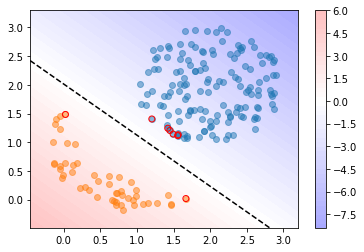

In [16]:
sv = svm_visualization(clf, df)
sv.show()

<font color='red'>Assignment:</font> Try **rbf** and **poly** kernels.

In [17]:
# Train SVM classifier with rbf kernel

clf = SVC(class_weight="balanced", kernel="rbf")
clf.fit(X_df, y_df)

SVC(class_weight='balanced')

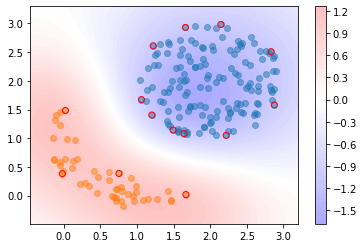

In [18]:
# Visualize SVM with rbf kernel
svm_visualization(clf, df).show()

In [19]:
# Number and location of support vectors for each class with rbf kernel
print("Numebr of support vectors:", clf.n_support_)
print("Location of support vectors:\n", clf.support_vectors_)

Numebr of support vectors: [10  4]
Location of support vectors:
 [[ 1.20372171  1.40495343]
 [ 1.64323351  1.08171429]
 [ 2.83212729  2.50798738]
 [ 2.2182862   1.05102852]
 [ 1.49379259  1.14332924]
 [ 1.22173649  2.61058964]
 [ 2.14602819  2.98131766]
 [ 1.06207975  1.67363038]
 [ 1.66266716  2.93021938]
 [ 2.87510795  1.5818248 ]
 [ 1.66855686  0.01866655]
 [ 0.02501113  1.48362746]
 [ 0.75513762  0.38621725]
 [-0.0171096   0.38395734]]


In [20]:
# Train SVM classifier with poly kernel

clf = SVC(class_weight="balanced", kernel="poly", degree=5)
clf.fit(X_df, y_df)

SVC(class_weight='balanced', degree=5, kernel='poly')

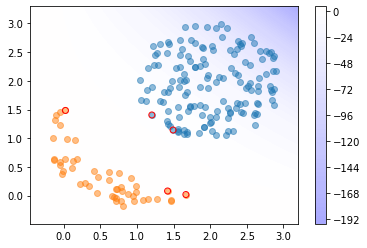

In [21]:
# Visualize SVM with poly kernel
svm_visualization(clf, df).show()

In [22]:
# Number and location of support vectors for each class with rbf kernel
print("Numebr of support vectors:", clf.n_support_)
print("Location of support vectors:\n", clf.support_vectors_)

Numebr of support vectors: [2 3]
Location of support vectors:
 [[1.20372171 1.40495343]
 [1.49379259 1.14332924]
 [1.66855686 0.01866655]
 [1.41860816 0.08048487]
 [0.02501113 1.48362746]]


<font color='red'>Question:</font> How do these two kernels work? Where do the support vectors locate, respectively?

**ANS**
<br>Rbf (radial basis function): rbf maps the data to an infinite dimension space through the following kernel function to better separate the data. The support vectors locate around the boundary for each class.
<br>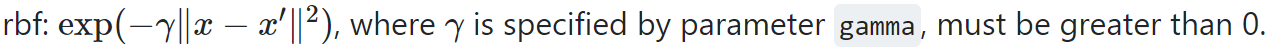
<br>Poly (polynomial): ploy maps the data to a higher dimension space of the order of the poly kernel function to better separate the data. The support vectors locate at the edge near the gap between different classes (similar to linear kernel).
<br>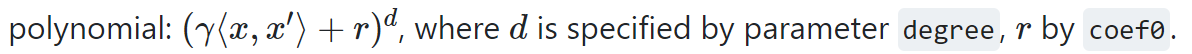